In [39]:
import numpy as np
from data.generateARMA  import generate as gA
from data.generateHarmonics  import generate as gH
from data.generateTrend  import generate as gT
import matplotlib.pyplot as plt
def AR_stable(coeff):
    return not (sum(np.abs(np.roots([1] + list(-1 * np.array(coeff[:])))) > 1) > 0)


def arma_data(arLags, maLags, noiseSD, timeSteps, startingArray=None):
    if startingArray == None:
        startingArray = np.zeros(np.max([len(arLags), len(maLags)]))  # start with all 0's
    noiseMean = 0.0
    (observedArray, meanArray, errorArray) = gA.generate(arLags, maLags, startingArray, timeSteps, noiseMean, noiseSD)

    return (observedArray, meanArray)


def generate_ARMA(timeSteps, ar_lags =0, ar = None, ma = None,  noise_sd = 1):
    signal = np.zeros(timeSteps)
    if ar_lags > 0:
        if ar is None:
            ar = np.random.random(ar_lags)
            while not (AR_stable(ar)):
                ar = np.random.random(ar_lags)
        if ma is None:
            ma = []
        ar_sig, _ = arma_data(ar, ma, noise_sd, timeSteps, startingArray=None, )
        signal += ar_sig

    return signal


In [58]:
def plot_spectrum(y):
    T = len(y)
    L = int(np.sqrt(T))
    N = T//L
    A = y[:L*N].reshape([L,N])
    A = A -np.mean(A)
    u,s,v = np.linalg.svd(A)
    S = np.cumsum(s**2)
    S = S/S[-1]
    plt.figure()
    plt.plot(S[:20], '-o')
    plt.xlabel('k')
    plt.ylabel('Energy of top k Singular Values')
    plt.title('Time series Spectrum')
    plt.ylim([0,1])
    plt.show()
    return S

# Generate time series with low-rank dynamics

Vary the rank between ~3 to ~11


[89.99936664 22.87624974 65.39121667 77.12463246 42.63923705]


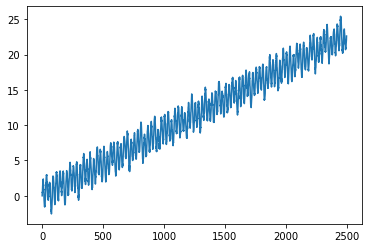

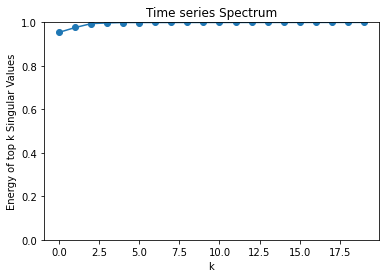

[43.48236467 64.44400966 69.317667   71.72271714 48.36420168]


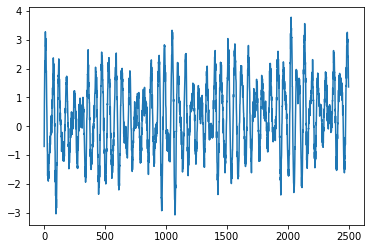

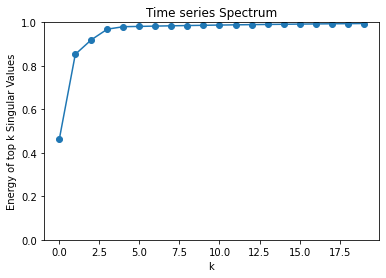

[78.51987466 90.36996306 49.3140586  52.27618766 59.1267123 ]


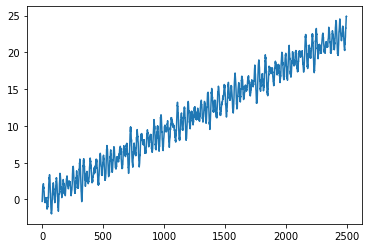

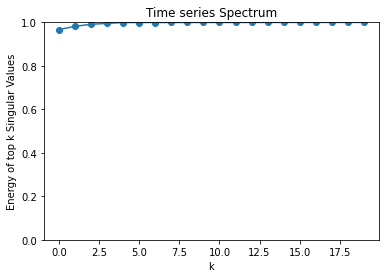

[77.75020537 51.12730709 64.81509456 67.33037152 52.30632183]


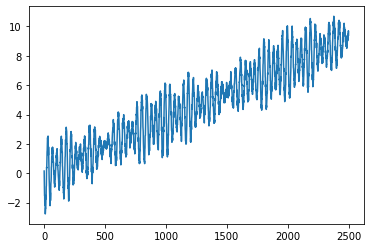

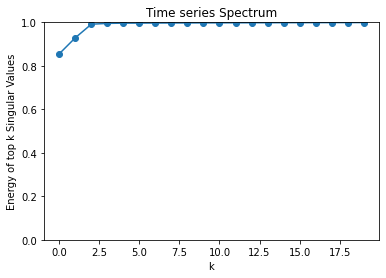

[43.80475304 30.52134928 61.94104769 88.02392206 54.70118263]


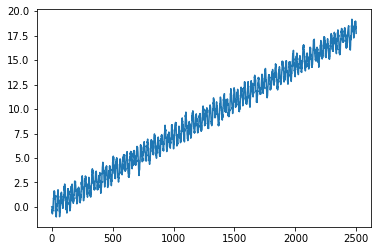

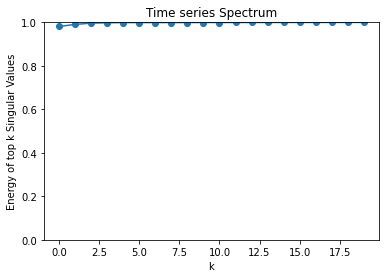

[72.25082907 88.73275319 30.09389693 74.01829885 28.09121032]


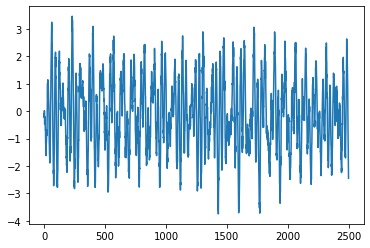

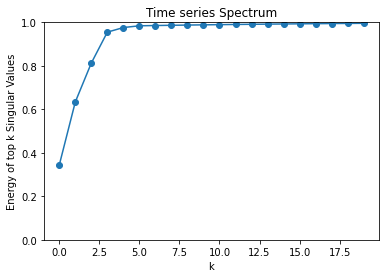

[83.66091117 90.54964413 76.41589202 57.10047872 32.59048156]


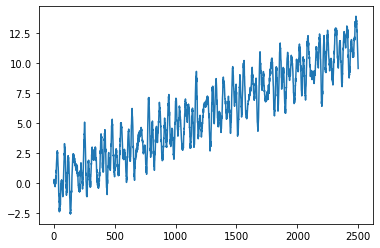

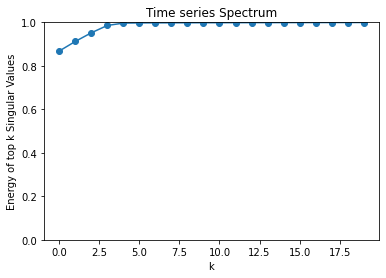

[36.33715464 61.47418425 85.60958456 89.53068545 22.61761067]


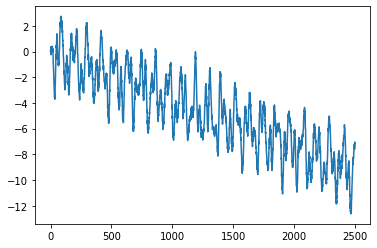

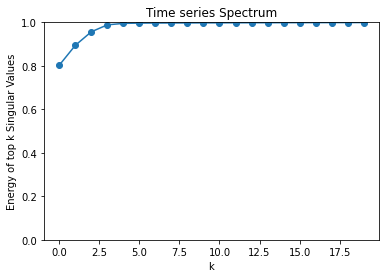

[21.9635762  66.98150791 54.58765356 58.92616267 44.0407648 ]


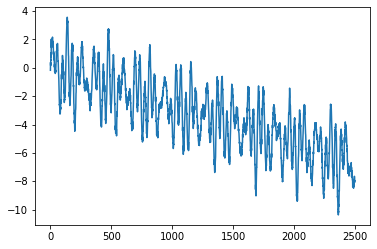

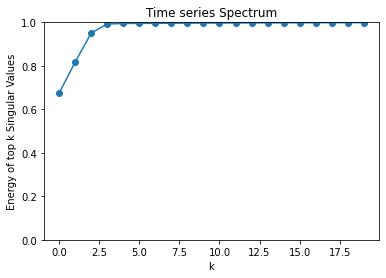

[70.24346408 44.44546642 82.76911566 77.85229532 36.30501571]


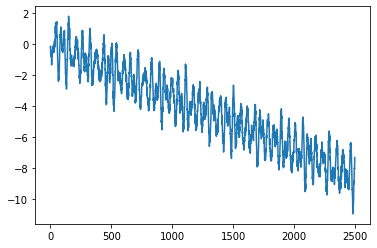

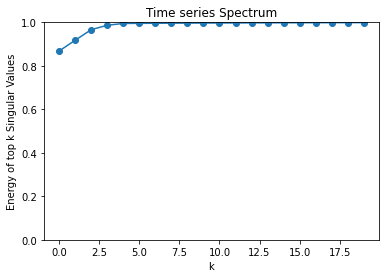

In [139]:
T = 2500
i =0
data = {}
for h in range(5,6,2):
    for _ in range(10):
        data[i] = {}
        sineCoeffArray = np.random.randn(h)
        sinePeriodsArray = 10 + (T//30)*np.random.random(h)
        print(sinePeriodsArray)
        damper = 0.005* np.random.randn()
        har_component = gH(sineCoeffArray, sinePeriodsArray, [], [], T)
        trend_component = gT(power = 1, displacement = 0, timeSteps = T,damper = damper)
        data[i]['signal'] = har_component + trend_component + 0.2*np.random.randn(T)
        plt.plot(data[i]['signal'] )
        s = plot_spectrum(data[i]['signal'])
        data[i]['true_rank'] = 2*h + 1
        i+=1


# Generate time-series with ~full-rank dynamics





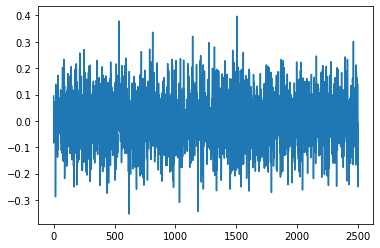

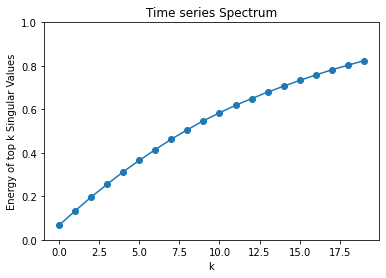

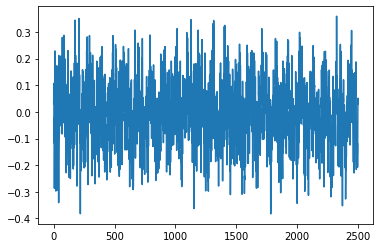

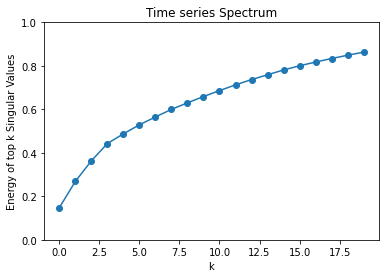

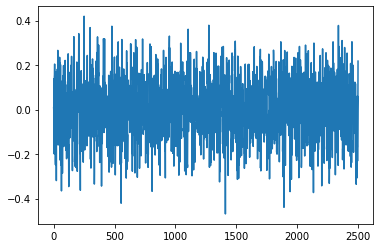

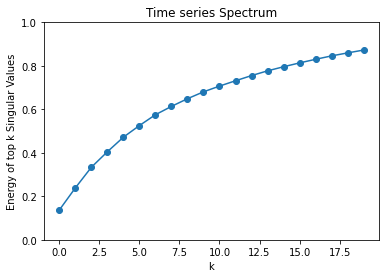

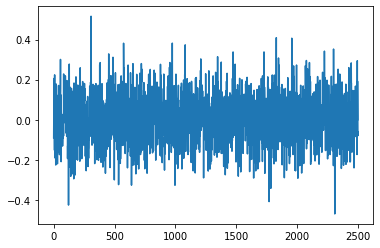

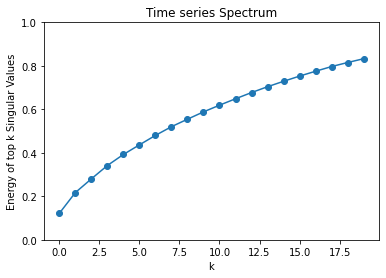

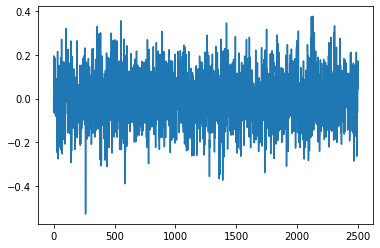

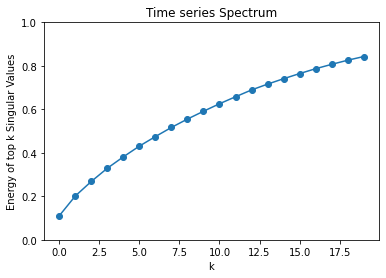

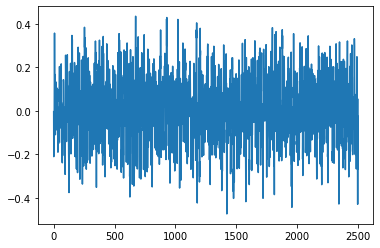

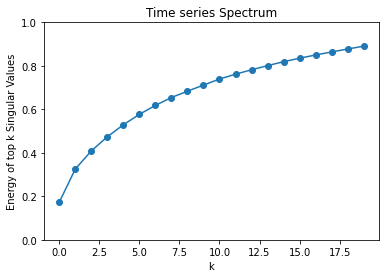

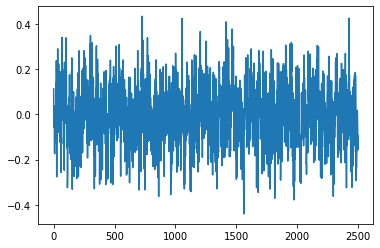

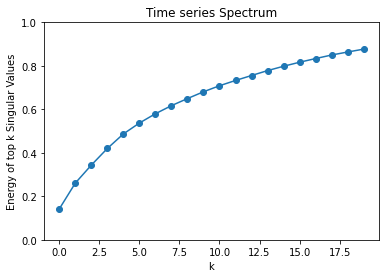

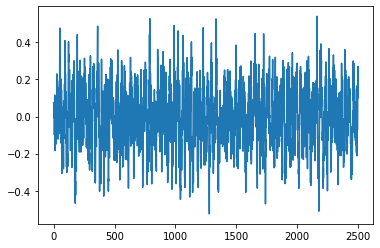

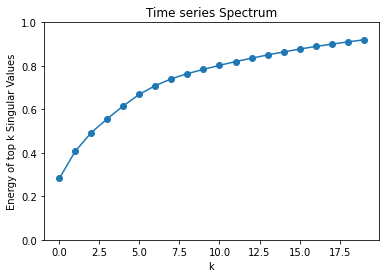

In [122]:
T = 2500
i =0
data_hr = {}
for h in range(1,16,2):
    data_hr[i] = {}
    sineCoeffArray = 0.05*np.random.randn(h)
    sinePeriodsArray = 10 + (T//10)*np.random.random(h)
    damper = 0.001* np.random.random()
    har_component = gH(sineCoeffArray, sinePeriodsArray, [], [], T)
    trend_component = gT(power = 1, displacement = 0, timeSteps = T,damper = damper)
    arma_component = generate_ARMA(timeSteps= T, ar= 6, ma=np.random.random(5),noise_sd= 0.2)
    data_hr[i]['signal'] =   0.1*np.random.randn(T) + arma_component + har_component
    plt.plot(data_hr[i]['signal'] )
    s = plot_spectrum(data_hr[i]['signal'])
    data[i]['true_rank'] = None
    i+=1

# Adding Anomalies


4
1
4
13
4
1
4


7

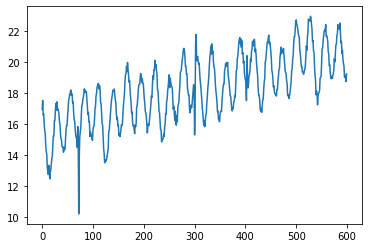

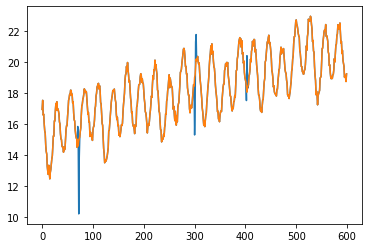

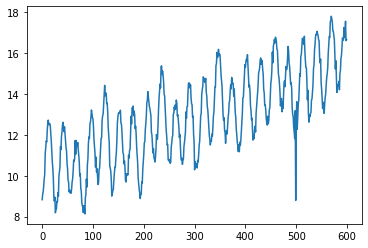

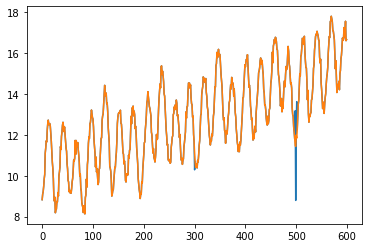

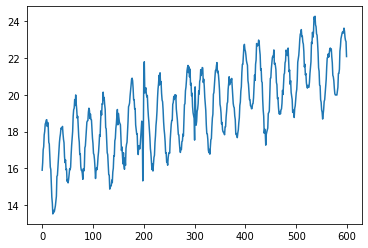

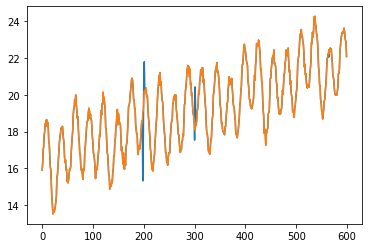

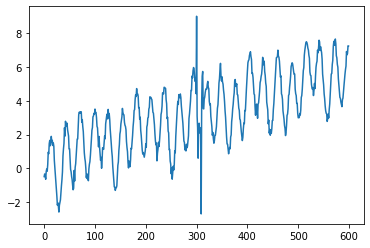

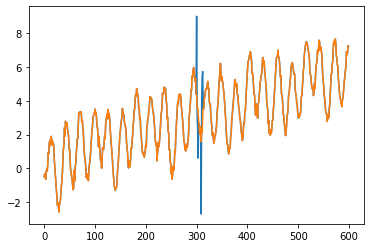

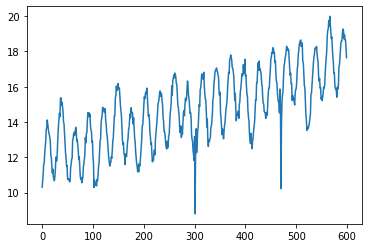

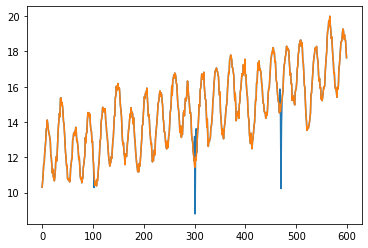

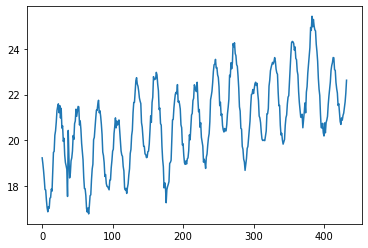

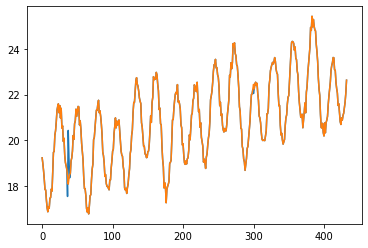

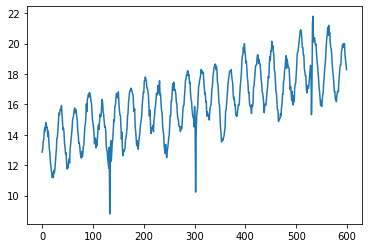

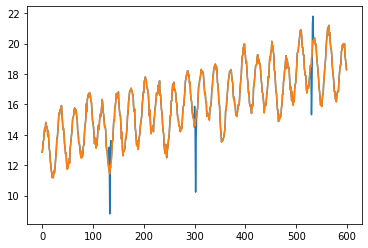

In [162]:
for key in data:
    n_points = np.random.poisson(5, 1)[0]
    an_points = np.random.randint(0,T-1,n_points)
    mean, std = np.mean(data[key]['signal']), np.std(data[key]['signal'])
    an_data = np.array(data[key]['signal'])
#     an_data[an_points] += std*np.random.randn(n_points) + mean
    for point in an_points:
        p = 0.5
        anomaly_length = np.random.poisson(5, 1)[0] if np.random.random()>p else 1
        an_data[point: point+ anomaly_length] += std/3*np.random.randn(anomaly_length) 
 
    
    for point in an_points:
        plt.figure()
        plt.plot(an_data[point-300:point+300])
        plt.figure()
        plt.plot(an_data[point-300:point+300])
        plt.plot(data[key]['signal'][point-300:point+300] )
    break
    
n_points

In [155]:
np.random.random()>p 

True

3

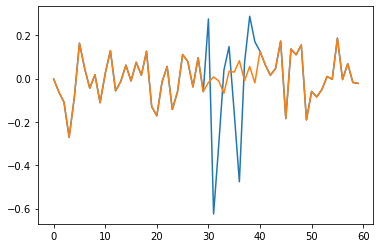

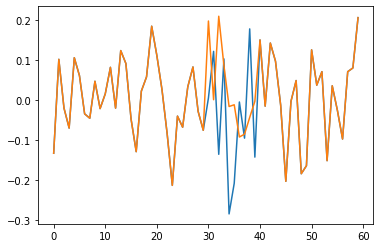

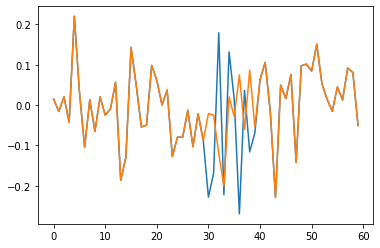

In [127]:
for key in data:
    n_points = np.random.poisson(5, 1)[0]
    an_points = np.random.randint(0,T-1,n_points)
    mean, std = np.mean(data_hr[key]['signal']), np.std(data_hr[key]['signal'])
    an_data = np.array(data_hr[key]['signal'])
#     an_data[an_points] += std*np.random.randn(n_points) + mean
    
    for point in an_points:
        an_data[point: point+ 10] += 2*std*np.random.randn(10) 
    
    
    for point in an_points:
        plt.figure()
        plt.plot(an_data[point-30:point+30])
        plt.plot(data_hr[key]['signal'][point-30:point+30] )
    break
    
n_points

array([5])